In [22]:
import pandas as pd 

### Collected Measurement

In [23]:
measuremnts = pd.read_csv('inflow_height_simulation.csv')
measuremnts = measuremnts[["height", "inflow"]]
measuremnts = measuremnts[measuremnts >= 0].dropna().reset_index(drop=True)

In [24]:
measuremnts.head()

,height,inflow
0,153.956204,270.638389
1,153.901945,265.665418
2,158.890433,276.249860
3,159.904305,262.572986
4,158.073539,246.394094


### LookUp Table

In [25]:
lookup_table = pd.read_csv("data_generation_mpc_110_190_6_all.csv")

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [26]:
lookup_table["height"] = lookup_table["height"]*100

In [27]:
import pandas as pd
import numpy as np

def find_closest_speeds(df, inflow, height, pump1_on=1, pump4_on=0):
    max_heigh = 170
    # Calculate the Euclidean distance for each row
    distances = df[['inflow', 'height']].sub(np.array([inflow, height]), axis=1).pow(2).sum(1).pow(0.5)
    
    # Find the index of the row with the smallest distance
    closest_index = distances.idxmin()
    pump1_speed, pump4_speed = df.loc[closest_index, ['speed1_rpm', 'speed4_rpm']]
    pump1_speed, pump4_speed = int(pump1_speed), int(pump4_speed)

    if (pump1_on == 1) & (height <= max_heigh):

        return 1*pump1_speed, 0*pump4_speed
    
    elif (pump4_on==1) & (height <= max_heigh): 
        
        return 0*pump1_speed, 1*pump4_speed
    
    elif height > max_heigh:
        return pump1_speed, pump4_speed



In [28]:
from tqdm import tqdm
import random

pump1_rpm_hist, pump4_rpm_hist= [], []

for index in tqdm(range(0,len(measuremnts))):
    if index % 200 == 0:
        pump1_on = random.randint(0, 1)
        pump4_on = 1 - pump1_on
        print(f"Iteration {index}:")
        if pump1_on == 1:
            print("Pump 1 is ON")
            print("Pump 4 is OFF")
        elif measuremnts.loc[index, "height"] > 170:
            print("Pump 1 is ON")
            print("Pump 4 is ON")

        else:
            print("Pump 1 is OFF")
            print("Pump 4 is ON")
    pump1_rpm, pump4_rpm = find_closest_speeds(lookup_table, measuremnts.loc[index, "inflow"], measuremnts.loc[index, "height"], pump1_on, pump4_on)
    pump1_rpm_hist.append(pump1_rpm)
    pump4_rpm_hist.append(pump4_rpm)


  0%|          | 8/1822 [00:00<00:22, 79.85it/s]

Iteration 0:
Pump 1 is ON
Pump 4 is OFF


 12%|█▏        | 216/1822 [00:02<00:16, 95.87it/s]

Iteration 200:
Pump 1 is OFF
Pump 4 is ON


 23%|██▎       | 416/1822 [00:04<00:13, 101.63it/s]

Iteration 400:
Pump 1 is ON
Pump 4 is OFF


 34%|███▎      | 612/1822 [00:06<00:14, 84.05it/s] 

Iteration 600:
Pump 1 is OFF
Pump 4 is ON


 45%|████▍     | 814/1822 [00:08<00:11, 84.23it/s]

Iteration 800:
Pump 1 is OFF
Pump 4 is ON


 56%|█████▌    | 1017/1822 [00:10<00:07, 107.21it/s]

Iteration 1000:
Pump 1 is ON
Pump 4 is ON


 67%|██████▋   | 1216/1822 [00:12<00:05, 106.40it/s]

Iteration 1200:
Pump 1 is ON
Pump 4 is OFF


 78%|███████▊  | 1414/1822 [00:14<00:03, 106.71it/s]

Iteration 1400:
Pump 1 is OFF
Pump 4 is ON


 89%|████████▊ | 1614/1822 [00:16<00:01, 108.57it/s]

Iteration 1600:
Pump 1 is ON
Pump 4 is OFF


100%|█████████▉| 1813/1822 [00:18<00:00, 106.17it/s]

Iteration 1800:
Pump 1 is ON
Pump 4 is OFF


100%|██████████| 1822/1822 [00:18<00:00, 98.52it/s] 


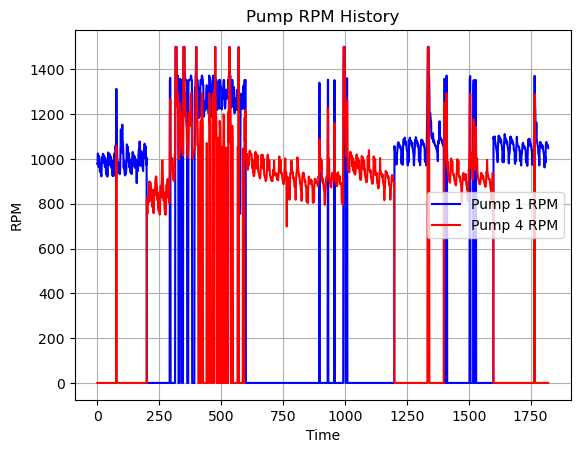

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wand

In [29]:
import matplotlib.pyplot as plt

x_values = range(len(pump1_rpm_hist))
fig, ax = plt.subplots()

ax.plot(x_values, pump1_rpm_hist, label='Pump 1 RPM', color='blue')
ax.plot(x_values, pump4_rpm_hist, label='Pump 4 RPM', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('RPM')
ax.set_title('Pump RPM History')
plt.grid()
ax.legend()

plt.show()
